### Setup

In [ ]:
!pip install -U -q PyDrive
!pip install scanpy
!pip install paste-bio
!pip install POT

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.2/104.2 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.0 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82807 sha256=43b3b3a150cf0f4ea4dea586ee7d62755ac51d230f783b816872c670b554e111
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=de5babebc32fcde0ae6e166c3e54696d867581ace84e557279ddb7b9073d833f
  Stored in directory: /root/.cache/pip/wheels/6a/aa/

Authenticating Google Drive to download files

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id = '1Emm9eRKYAdc1kwpI4_RWqJAsXwY5BnLK'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice1_coords.csv')

id = '1uQ3OcOvgznBd0-YAyFM5IMm-9Atb0PMX'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice1.h5')

id = '1Tix0CRW20diWZ9Y3Q4TvUa86CvUY6Gui'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice2_coords.csv')

id = '12FJ8ph0MN4sNWqQQe1G4vrZNi05mf6Fx'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice2.h5')

id = '1MQt_AyKssgWpXV64vYtQLO5SlYDUilSu'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice3_coords.csv')

id = '1AQqbuLcfHc3hwsTrDVPyH_5Bdfsb9Z_b'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice3.h5')

id = '1-zQsQbP0GXol0RuICGHp3tiaLQkfSFy-'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice4_coords.csv')

id = '1iAEX8wrO49KldN1Zct928vHSEDeX2gzm'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice4.h5')

id = '19J4fxCvPaotiFS6mMBPW48pYsDS937sL'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice5_coords.csv')

id = '1VyzyoWBud-SIeleRKO99eFJMKs0koomI'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice5.h5')

id = '1aVUdgL9arv4eVBCGFkpA7kRJMFKWQzqn'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice6_coords.csv')

id = '1JBJkwZuB8ZAWJSyTaNinm6b5zCJoDeqg'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice6.h5')

id = '1hEoMbe9Y04iotGCOFCJavC7Vg6qmTis0'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice7_coords.csv')

id = '1j63oSsO5_crm2u75E_lKcXA_xq8ItwsE'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice7.h5')

id = '1xZgN6rFVm80lLeKhN0zS0K3idUKBarVH'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice8_coords.csv')

id = '1LKZcCaZylxkEDzJCoijrty4JqreUKzW5'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice8.h5')

Imports

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import paste as pst
import seaborn as sns
import plotly.express as px

### Plot clusters

Read data

In [ ]:
slice_names = ["slice1", "slice2", "slice3", "slice4", "slice5", "slice6", "slice7", "slice8"]

def load_slices():
  slices = []
  for name in slice_names:
    adata_slice = sc.read_10x_h5(name + ".h5")
    coords_slice = np.genfromtxt(name + "_coords.csv", usecols=(2,3), delimiter=',', skip_header=1)
    adata_slice.obsm['spatial'] = coords_slice
    # preprocess data
    sc.pp.filter_genes(adata_slice, min_counts = 15)
    sc.pp.filter_cells(adata_slice, min_counts = 100)
    slices.append(adata_slice)
  return slices

Plot function

In [ ]:
def plot_clusters(adata, title):
    x = adata.obsm['spatial'][:, 0]
    y = adata.obsm['spatial'][:, 1]
    ann_mat = adata.X.toarray()
    kmeans = KMeans(n_clusters = 7, n_init = "auto").fit(ann_mat)
    plt.figure()
    hue = kmeans.labels_
    sns.scatterplot(x=x, y=y, hue=hue).set(title=title, xticks=[], yticks=[])
    sns.despine(left=True, bottom=True)
    plt.show()

Access slices

In [ ]:
slices = load_slices()

In [ ]:
slice1, slice2, slice3, slice4, slice5, slice6, slice7, slice8 = slices

In [ ]:
from sklearn.cluster import KMeans

Plotting original clusters

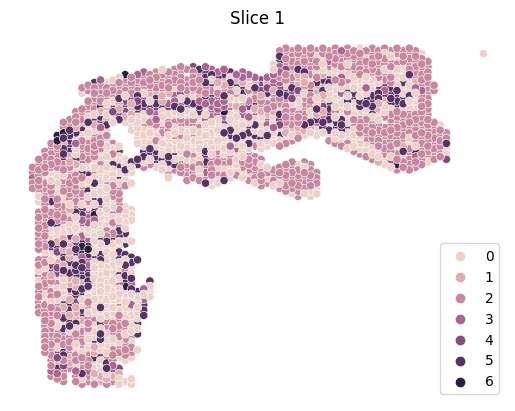

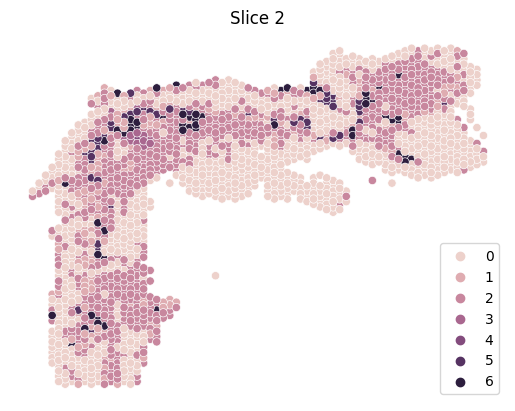

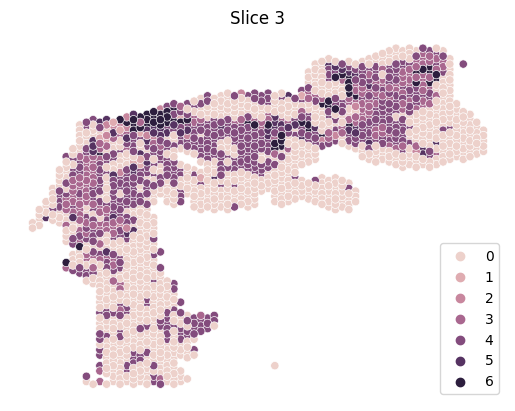

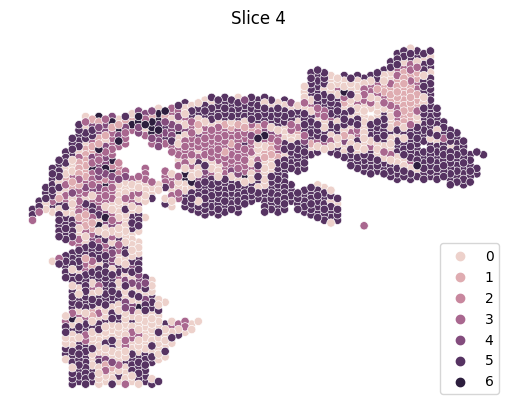

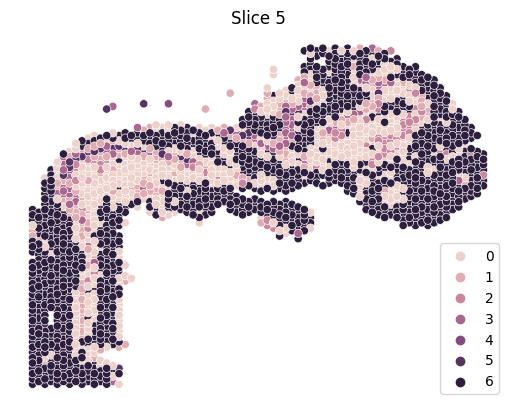

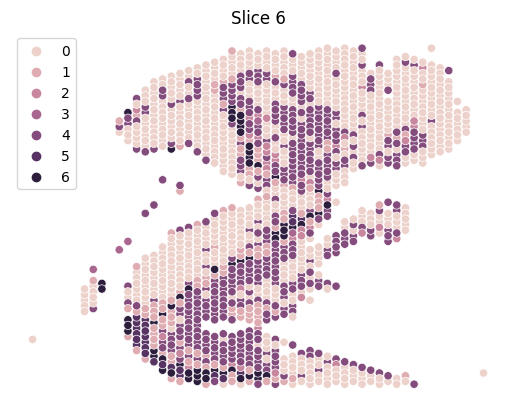

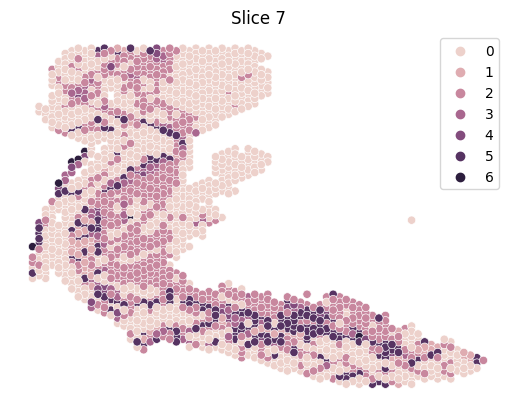

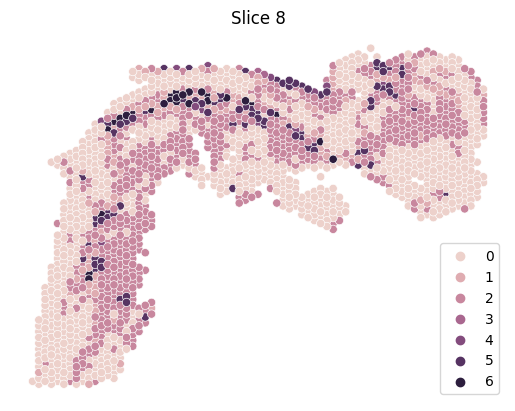

In [ ]:
for i in range(len(slices)):
  plot_clusters(slices[i], "Slice " + str(i + 1))

In [ ]:
def plot_3d(slices):
  dfs = []

  for i, L in enumerate(slices):
    df = pd.DataFrame(L.obsm['spatial'], columns=['x', 'y'])

    df['z'] = i * 10
    df['label'] = "Slice " + str(i + 1)
    dfs.append(df)

  df = pd.concat(dfs)
  fig = px.scatter_3d(df, x='x', y='y', z='z', color='label', color_discrete_sequence = px.colors.sequential.Turbo, title="3D Reconstruction")
  fig.update_layout(legend_title_text='Annotations', scene={'zaxis': {'autorange':'reversed'}})
  fig.show()

In [ ]:
plot_3d(slices)